In [1]:
import pandas as pd
import numpy as np

In [94]:
example_task_scores = [0.8, 0.9, 0.7, 0.7, 0.8, 0.85, 0.85, 0.9, 0.1, 0.99, 0.2, 0.87, 0.14, 0.9, 0.1, 0.1, 0.1] # newest task score = 0.9 

# 5 types of people that we are considering so far 
# Type 1: increasing
# Type 2: decreasing
# Type 3: 
0.6, 0.7, 0.68, 0.71, 0.8, 0.6, 0.1, 0.9, 0.5, 0.3, 0.7, 0.3, 0.1, 

example_task_scores[5 - 3 + 1:5 + 1]

n = 50
random_task_scores = [np.random.random() for i in range(n)]

bad_task_scores = [np.random.random() * 0.5 for i in range(n)]
good_task_scores = [np.random.random() * 0.2 + 0.8 for i in range(n)]
improvement_task_scores = [0.2 + (i / (n * 2)) + (np.random.random() * 0.1) - 0.05 for i in range(n // 2)] + \
                            [np.random.random() * 0.2 + 0.8 for i in range(n // 2)]

In [95]:
def logistic(x, k):
    return 1 / (1 + np.e**(-k * (x - 0.5)))
def ucs(task_scores, n_func, a):
  ucs = 0.5
  example_ucs_scores = [ucs]
  c_values = [0.5]
  for i in range(len(task_scores)):
    n = n_func(i)
    var_scores = np.var(task_scores[max(0, i-n+1):i+1])
    c = logistic(var_scores / (np.log(i + 2) / (np.log(a))), 3) #have completed i + 1 tasks at this point
    c_values.append(c)
    ucs = ucs * (1 - c) + (c) * task_scores[i] #task_scores[i] = latest task score
    example_ucs_scores.append(ucs)

  return example_ucs_scores, c_values

In [96]:
def run_ucs(task_scores):
    a = 1000
    ucs_n, c_values_n = ucs(task_scores, lambda x: 20, a)
    ucs_proportional, c_values_proportional = ucs(task_scores, lambda n: int(.25 * n) + 1, a)
    ucs_scores_sqrt, c_values_sqrt = ucs(task_scores, lambda n: int(np.sqrt(n)) + 1, a)
#     last n
    task_scores = [0] + task_scores
    df = pd.DataFrame({'task scores': task_scores, 'ucs': ucs_n, 'c': c_values_n}, index=range(len(c_values_n)))
    df.plot.line()
#     last 25%
    df = pd.DataFrame({'task scores': task_scores, 'ucs': ucs_proportional, 'c': c_values_proportional}, index=range(len(c_values_proportional)))
    df.plot.line()
#     last sqrt(n)
    df = pd.DataFrame({'task scores': task_scores, 'ucs': ucs_scores_sqrt, 'c': c_values_sqrt}, index=range(len(c_values_sqrt)))
    df.plot.line()

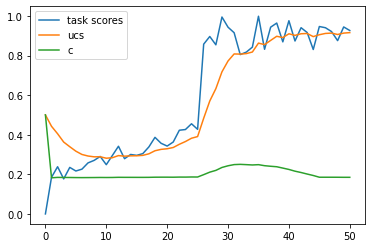

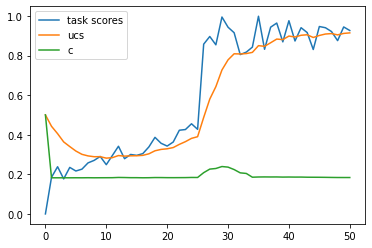

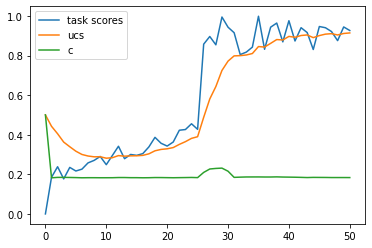

In [97]:
run_ucs(improvement_task_scores)

In [49]:
random_task_scores = [0] + example_task_scores
df = pd.DataFrame({'task scores': random_task_scores, 'ucs': ucs_scores_sqrt, 'c': c_values_sqrt}, index=range(len(c_values_sqrt)))
df.plot.line()

NameError: name 'ucs_scores_sqrt' is not defined

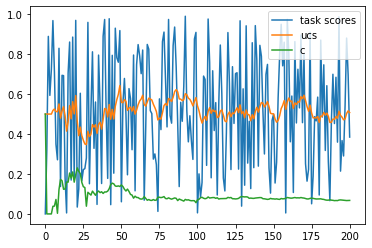

In [ ]:
example_task_scores2 = [0] + example_task_scores
df = pd.DataFrame({'task scores': example_task_scores2, 'ucs': example_ucs_proportional, 'c': c_values_proportional}, index=range(len(example_ucs_proportional)))
df.plot.line()

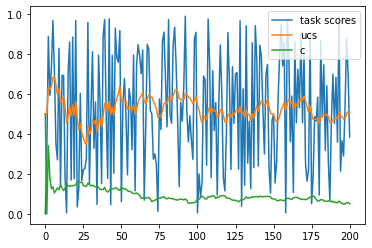

In [ ]:
example_task_scores3 = [0] + example_task_scores
df = pd.DataFrame({'task scores': example_task_scores3, 'ucs': example_ucs, 'c': c_values}, index=range(len(example_ucs)))
df.plot.line()

In [ ]:
multiple_ucs = [0.8, 0.4]

article_score = (0.8 / sum(multiple_ucs))user1_contribution + (0.4 / sum(multiple_ucs))*user2_contribution